In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

cargamos el dataset

In [4]:
propiedades= pd.read_csv ("propiedades_egipto.csv")

vemos a primera vista si hay valores nulos explicitos

In [5]:
from scripts.data_processing import MissingMethods


,variable,n_missing,n_cases,pct_missing
0,type,0,11418,0.0
1,title,0,11418,0.0
2,location,0,11418,0.0
3,bedroom,0,11418,0.0
4,bathroom,0,11418,0.0
5,size_sqm,0,11418,0.0
6,price,0,11418,0.0


In [ ]:

'''usamos esta funcion para colocar en una matriz el numero de casos nulos que tiene cada variable ,
 el numero de casos totales , y el porcentaje que representan estos datos nulos del total de los
 datos'''

propiedades.missing.missing_variable_summary()


Graficamos para ver el contenido de los valores missing de mejor manera

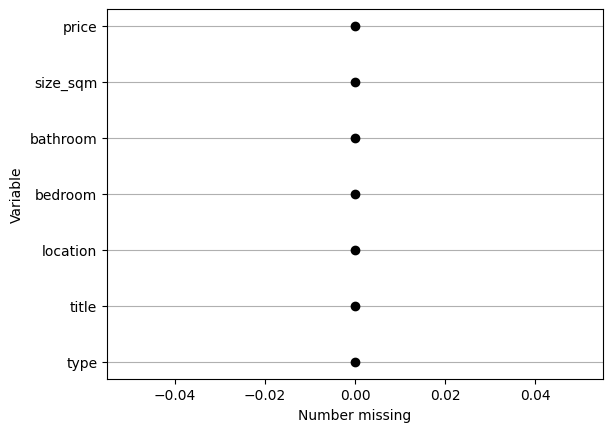

In [6]:
from scripts.data_visualization import MissingMethods

propiedades.missing.missing_variable_plot()

observamos que tipo de variables tenemos para ver si tenemos que hacer cambios

In [7]:
propiedades.dtypes

type        object
title       object
location    object
bedroom     object
bathroom     int64
size_sqm    object
price       object
dtype: object

In [8]:
'''usamos esta funcion en los datos para ver los valores unicos de cada columna y asi ver si hay datos
missing ocultos o implicitos'''

propiedades.select_dtypes(object).apply(pd.unique)

type        [Duplex, Villa, Apartment, Townhouse, Penthous...
title       [Prime Location Duplex Fully Finished With A\C...
location    [Park View, North Investors Area, New Cairo Ci...
bedroom                 [4, 3, 5, 2, 1, 7, 6, 8, Studio, {0}]
size_sqm    [345, 285, 210, 230, 284, 172, 250, 220, 114, ...
price       [6,850,000, 10,000,000, 5,700,000, 7,510,000, ...
dtype: object

podemos ver a simple vista que hay valores nulos implicitos ya que cuando vemos los valores unicos por columna vemos en la columna 'bedroom' un valor de {0} y un valor categorico 'studio'

creamos otro dataset con las columnas que vamos a necesitar

In [9]:
propiedades2= propiedades[['bedroom','bathroom','type','size_sqm','price']]
propiedades2

,bedroom,bathroom,type,size_sqm,price
0,4,4,Duplex,345,"6,850,000"
1,3,3,Villa,285,"10,000,000"
2,3,3,Apartment,210,"5,700,000"
3,4,4,Townhouse,230,"7,510,000"
4,5,6,Penthouse,284,"8,511,300"
...,...,...,...,...,...
11413,8,7,Villa,"1,500","30,000,000"
11414,4,4,Townhouse,220,"10,276,891"
11415,3,3,Apartment,177,"2,811,346"
11416,5,4,Penthouse,275,"3,000,000"


observamos los valores unicos de la variable 'type' para conocerlos y posteriormente transformarlos

In [10]:
valores_type=propiedades2['type'].unique()
valores_type

array(['Duplex', 'Villa', 'Apartment', 'Townhouse', 'Penthouse', 'iVilla',
       'Twin House', 'Hotel Apartment', 'Chalet', 'Compound'],
      dtype=object)

In [11]:
propiedades_copia = propiedades2.copy(deep=True)
propiedades_copia.columns

Index(['bedroom', 'bathroom', 'type', 'size_sqm', 'price'], dtype='object')

hacemos un encoder sobre esta columna para sustituir sus valores por numeros

In [12]:
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing


In [13]:
propiedades_copia = propiedades2.copy(deep=True)

# Definimos la columna 'type' como una lista para poder utilizar make_column_transformer
columnas_categoricas = ['type']

# Creamos el transformador para las columnas categóricas
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), columnas_categoricas),
    remainder="passthrough")

# Aplicamos la transformación
datos_transformados = pd.DataFrame(
    categorical_transformer.fit_transform(propiedades_copia),
    columns=categorical_transformer.get_feature_names_out(),
    index=propiedades_copia.index
).rename(columns=lambda x: x.removeprefix("ordinalencoder__")
).rename(columns=lambda x: x.removeprefix("remainder__"))





In [14]:
datos_transformados


,type,bedroom,bathroom,size_sqm,price
0,3.0,4,4,345,"6,850,000"
1,8.0,3,3,285,"10,000,000"
2,0.0,3,3,210,"5,700,000"
3,6.0,4,4,230,"7,510,000"
4,5.0,5,6,284,"8,511,300"
...,...,...,...,...,...
11413,8.0,8,7,"1,500","30,000,000"
11414,6.0,4,4,220,"10,276,891"
11415,0.0,3,3,177,"2,811,346"
11416,5.0,5,4,275,"3,000,000"


vemos que ya los datos estan transformados, pero aun hay que modificar una coma en la columna price ya que python no interpreta la coma de la manera que necesitamos

In [15]:
'''con este codigo le decimos que remplace la , por un espacio vacio para que las cantidades de estas
columnas nos queden corridas'''

datos_transformados['price'] = datos_transformados['price'].str.replace(',', '')
datos_transformados['size_sqm'] = datos_transformados['size_sqm'].str.replace(',', '')
datos_transformados

,type,bedroom,bathroom,size_sqm,price
0,3.0,4,4,345,6850000
1,8.0,3,3,285,10000000
2,0.0,3,3,210,5700000
3,6.0,4,4,230,7510000
4,5.0,5,6,284,8511300
...,...,...,...,...,...
11413,8.0,8,7,1500,30000000
11414,6.0,4,4,220,10276891
11415,0.0,3,3,177,2811346
11416,5.0,5,4,275,3000000


ahora ya si podemos pasarlos a datos numericos sin que existan errores ni datos nulos por estos errores

In [16]:
'''aqui pasamos nuestros datos de tipo object a tipo numerico para que sean aceptados por nuestro algoritmo'''

datostransformados = datos_transformados.apply(pd.to_numeric, errors='coerce')
datostran= datostransformados.astype(float)

datostran

,type,bedroom,bathroom,size_sqm,price
0,3.0,4.0,4.0,345.0,6850000.0
1,8.0,3.0,3.0,285.0,10000000.0
2,0.0,3.0,3.0,210.0,5700000.0
3,6.0,4.0,4.0,230.0,7510000.0
4,5.0,5.0,6.0,284.0,8511300.0
...,...,...,...,...,...
11413,8.0,8.0,7.0,1500.0,30000000.0
11414,6.0,4.0,4.0,220.0,10276891.0
11415,0.0,3.0,3.0,177.0,2811346.0
11416,5.0,5.0,4.0,275.0,3000000.0


vemos mediante un graficos cuantos valores nulos hay , tambien mostramos en una tabla la cantidad de valores nulos y el porcentaje que representan del total de los datos

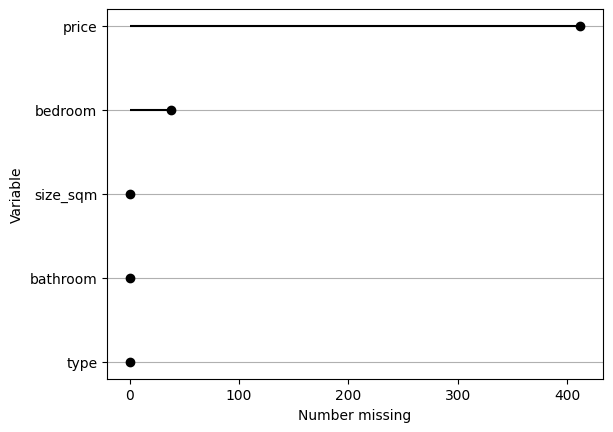

In [17]:

datostran.missing.missing_variable_plot()

vemos que ahora ya tenemos datos missing , procedemos a verlos en la matriz para que ver porcentaje representan del total de nuestros datos

In [18]:

datostran.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,type,0,11418,0.000000
1,bedroom,38,11418,0.332808
2,bathroom,0,11418,0.000000
3,size_sqm,0,11418,0.000000
4,price,412,11418,3.608338


vemos mediante un boxplot la si nuestro variable price posee datos atipicos

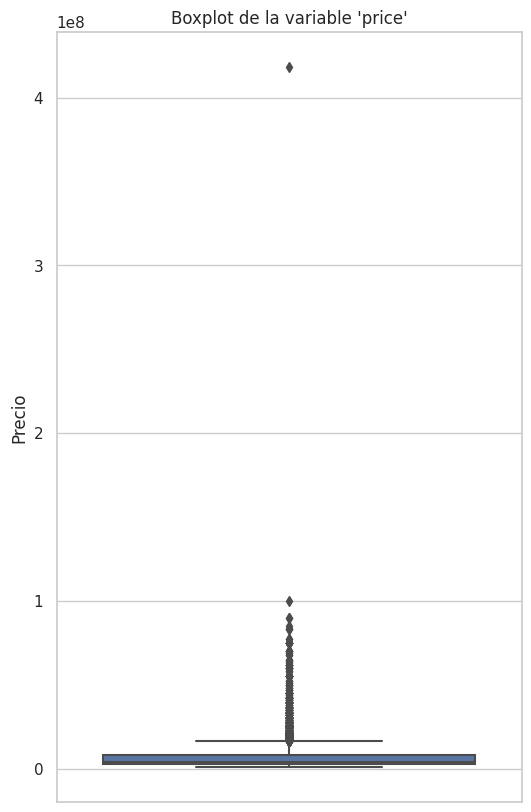

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el boxplot en posición vertical
plt.figure(figsize=(6, 10))  # Ajusta el tamaño de la figura si es necesario
sns.boxplot(y=datostran["price"])

# Agrega título y etiquetas de ejes
plt.title("Boxplot de la variable 'price'")
plt.xlabel("")
plt.ylabel("Precio")

# Muestra el gráfico
plt.show()

graficamos los datos en un cuadro blanco y gris para asi ver de manera visual donde se encuentran los datos nulos de cada columna y luego ordenamos por los datos nulos de la columna price , para ver si guardan una correlacion con los datos nulos de las otras columnas

<Axes: >

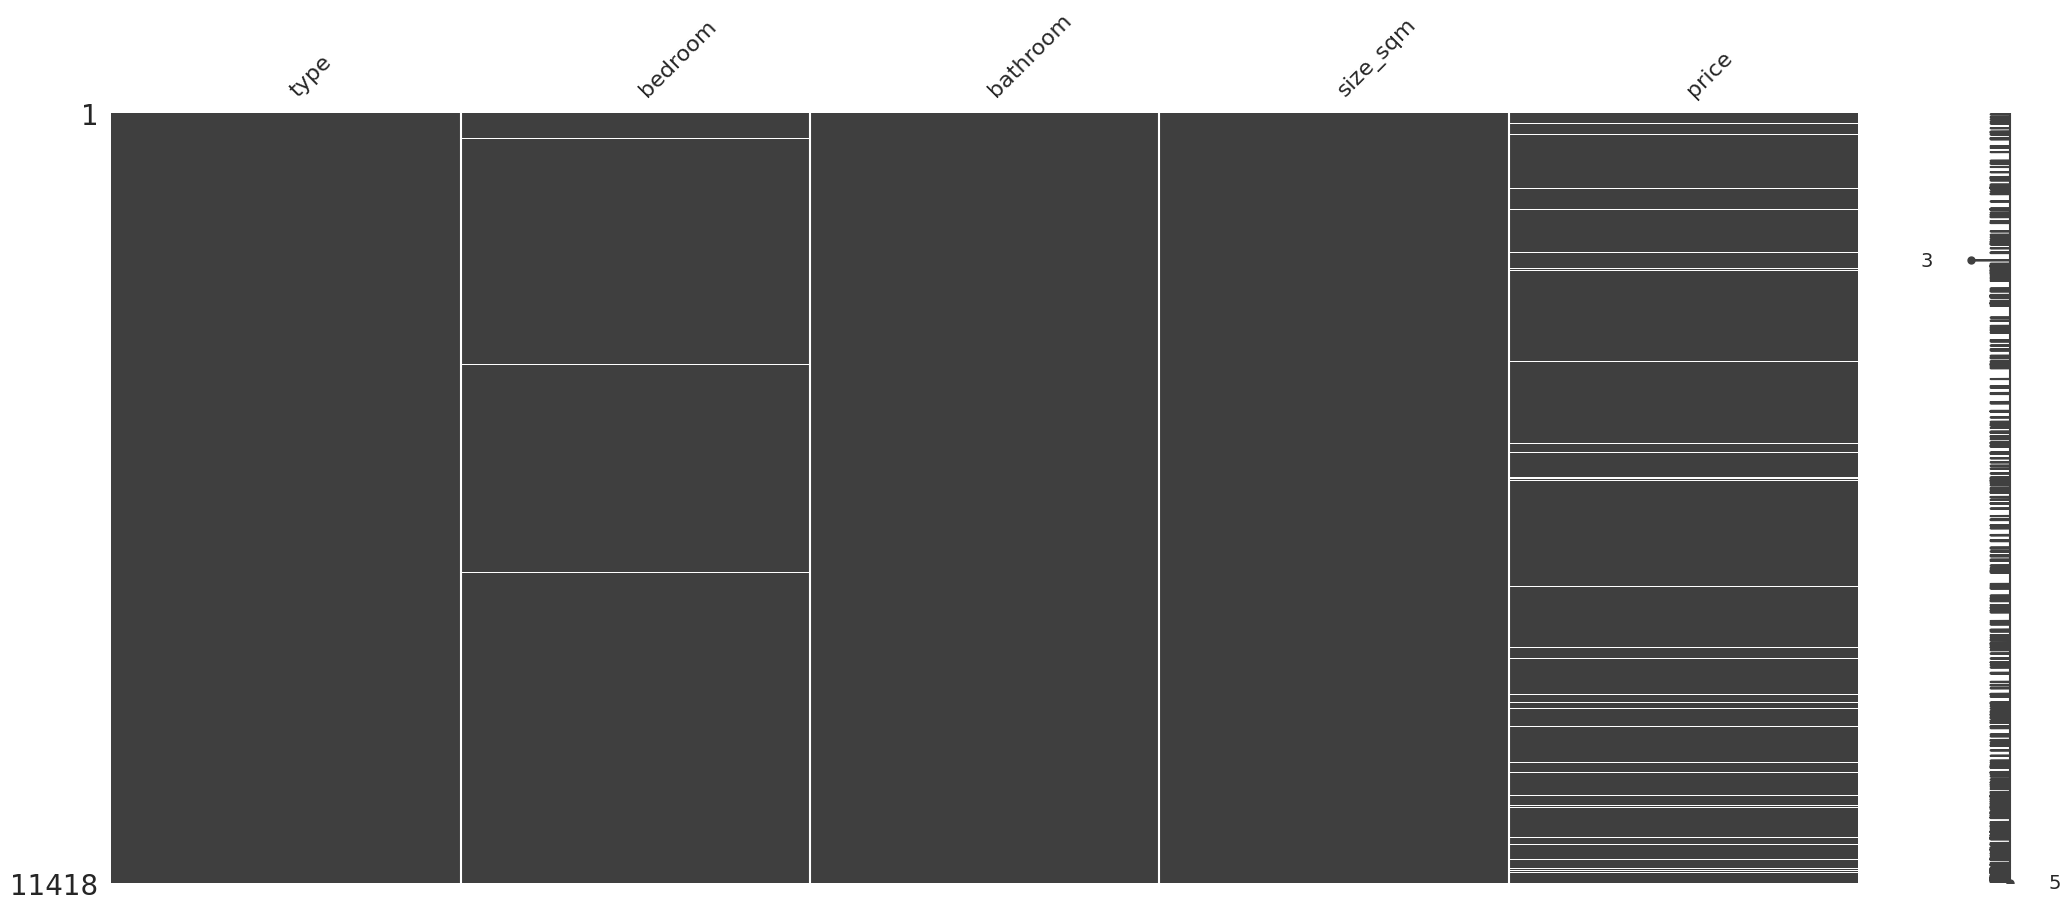

In [20]:
'''est funcion nos ayuda a ver de manera visual en que espacio estan ubicados nuestros datos por columna
y ordenandolos por alguna columna  vemos si nuestros datos nulos guardan algun tipo de correlacion
con los datos nulos de otra columna'''

missingno.matrix(df=datostran)

<Axes: >

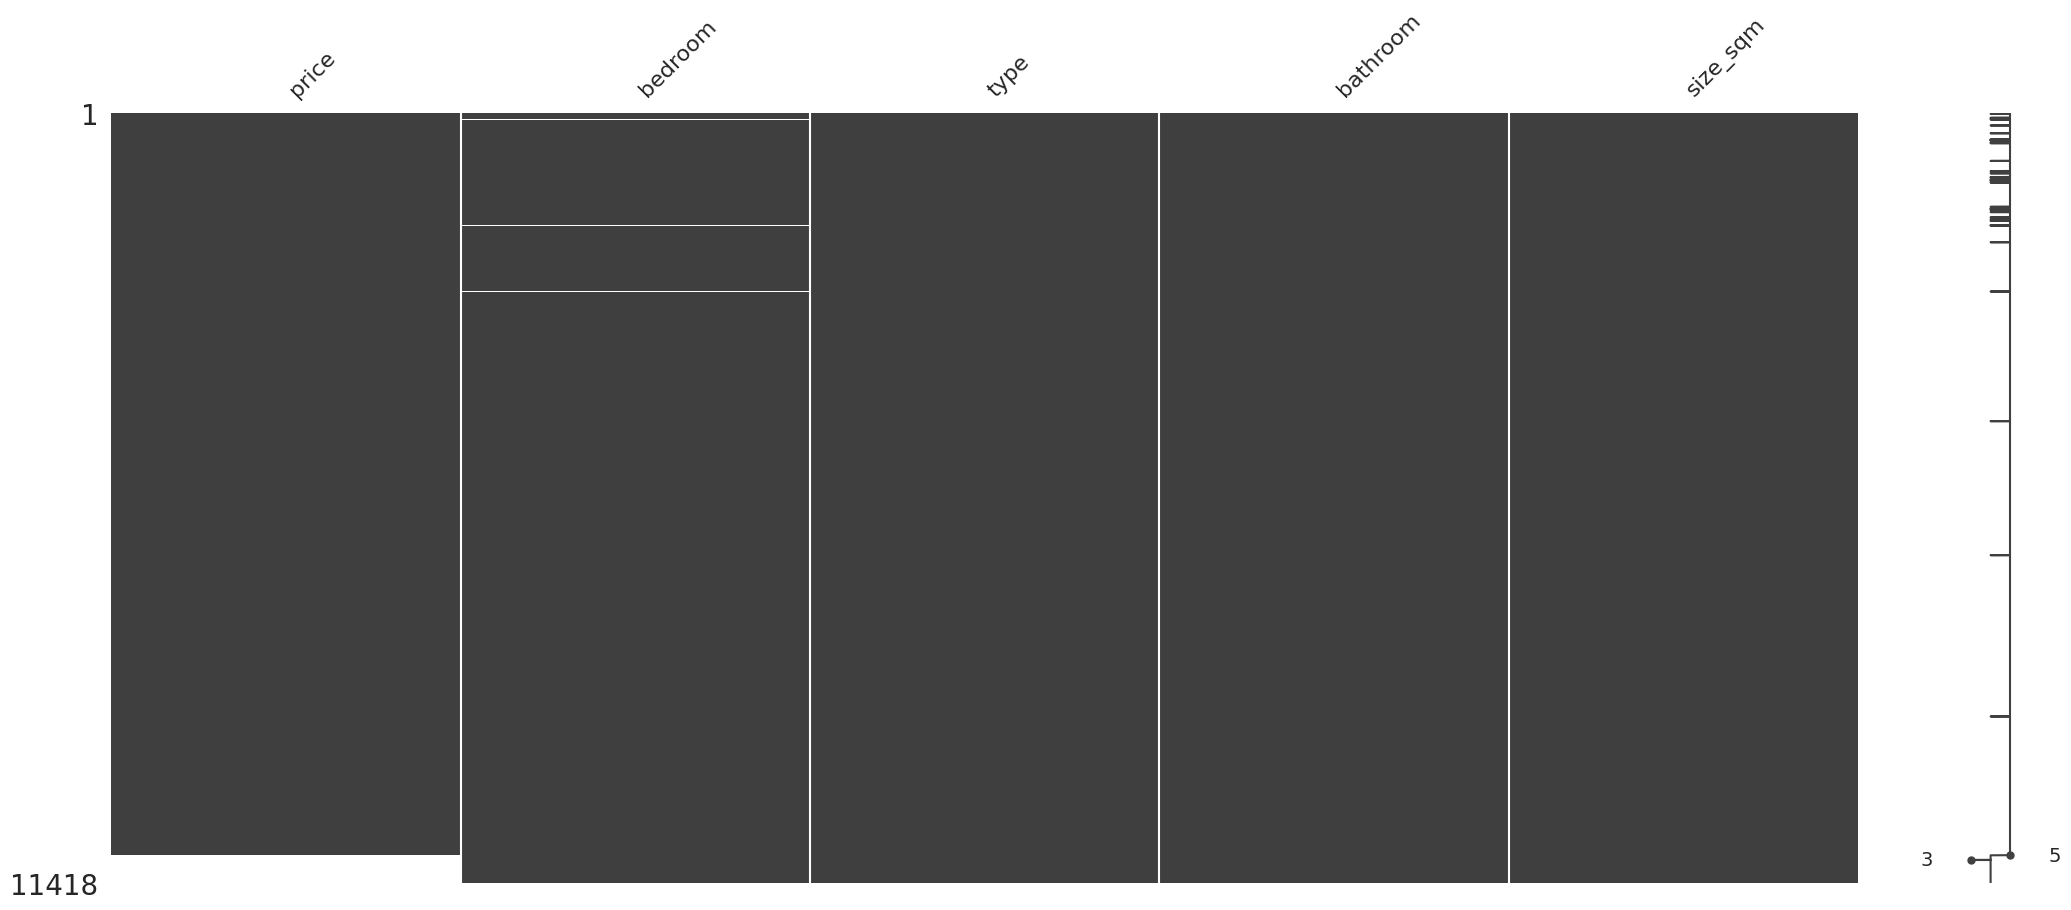

In [20]:
from scripts.data_visualization import MissingMethods
grafico_nulos=visualizar_patrones_faltantes(datostran, "price")
grafico_nulos

armamos un dataset solo con los datos nulos de la columna price  para ver de cuantos datos nulos disponemos

In [21]:

filas_nulas = datostran[datostran.isnull().any(axis=1)]

print(filas_nulas)
#en total vemos que tenermos un total de 449 datos nulos

       type  bedroom  bathroom  size_sqm  price
20      0.0      3.0       3.0     136.0    NaN
60      6.0      4.0       4.0     316.0    NaN
95      0.0      2.0       2.0     139.0    NaN
131     3.0      3.0       3.0     144.0    NaN
155     0.0      3.0       3.0     191.0    NaN
...     ...      ...       ...       ...    ...
11387   8.0      3.0       3.0     267.0    NaN
11388   0.0      2.0       2.0      96.0    NaN
11390   8.0      3.0       3.0     267.0    NaN
11407   0.0      3.0       3.0     155.0    NaN
11408   0.0      3.0       2.0     220.0    NaN

[449 rows x 5 columns]


en este caso ya que nuestros datos nulos representan un % muy bajo de nuestros datos totales,  y no estamos trabajando con la variable direccion que es otro caracteristica por la cual podemos filtrar datos , tomaremos la decision de eliminar lo datos nulos

In [22]:
datos_clean=datostran.dropna(subset=["price", "bedroom"],
how = "any")

print(datos_clean)

       type  bedroom  bathroom  size_sqm       price
0       3.0      4.0       4.0     345.0   6850000.0
1       8.0      3.0       3.0     285.0  10000000.0
2       0.0      3.0       3.0     210.0   5700000.0
3       6.0      4.0       4.0     230.0   7510000.0
4       5.0      5.0       6.0     284.0   8511300.0
...     ...      ...       ...       ...         ...
11413   8.0      8.0       7.0    1500.0  30000000.0
11414   6.0      4.0       4.0     220.0  10276891.0
11415   0.0      3.0       3.0     177.0   2811346.0
11416   5.0      5.0       4.0     275.0   3000000.0
11417   5.0      3.0       3.0     160.0   4554066.0

[10969 rows x 5 columns]


ya que tenemos nuestros datos limpio procedemos a crear una matriz de correlacion para ver si existen correlaciones entre sus variables

<Axes: >

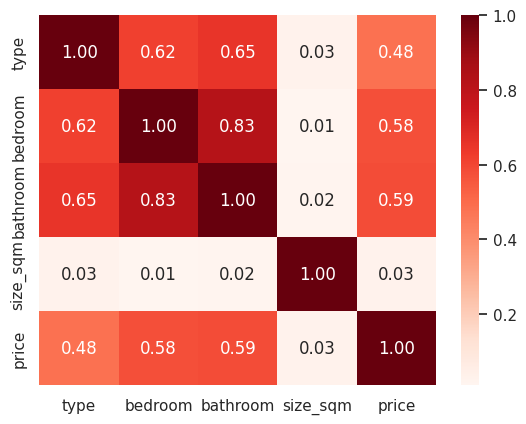

In [23]:
from scripts.data_visualization import MissingMethods

matriz_correlacion(datos_clean)

podemos ver que no hay una alta correlacion entre sus variables , si hay algunas que correlacionana mas que otras , pero ninguna correlacion fuerte

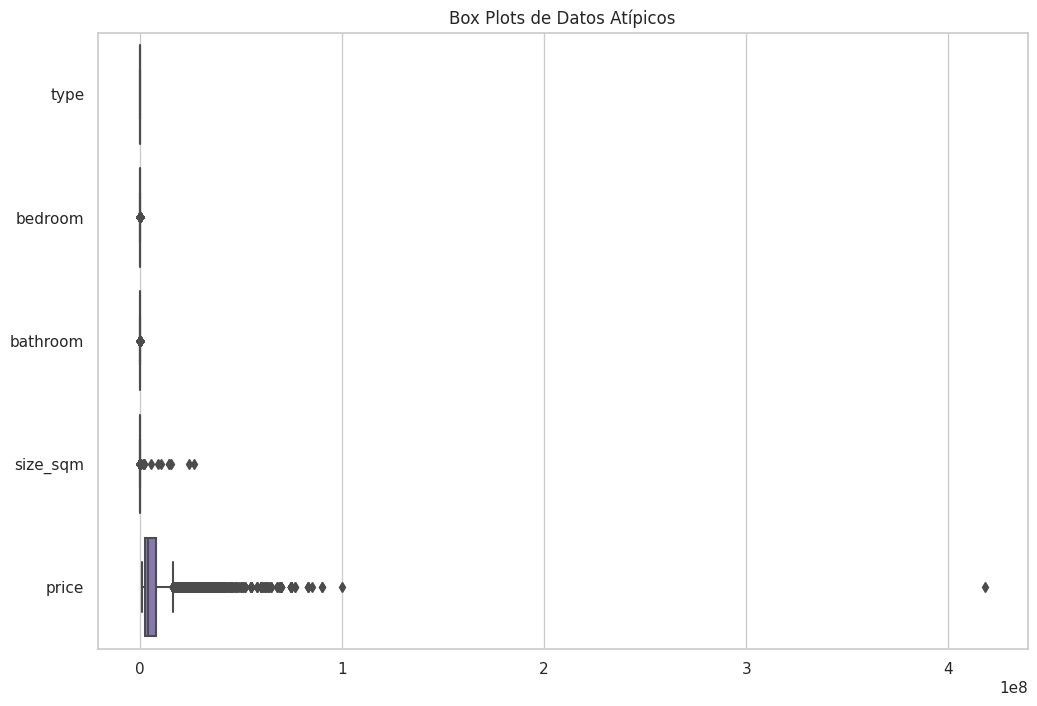

In [24]:
'''con este codigo mostramos todas nuestras variables en boxplot para ver la precencia de datos atipicos
ya que estos podrian alterar a nustros algoritmos'''

import seaborn as sns
import matplotlib.pyplot as plt


# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos gráficos de caja para todas las variables
sns.boxplot(data=datos_clean, orient="h")

# Añadimos título al gráfico
plt.title("Box Plots de Datos Atípicos")

plt.show()

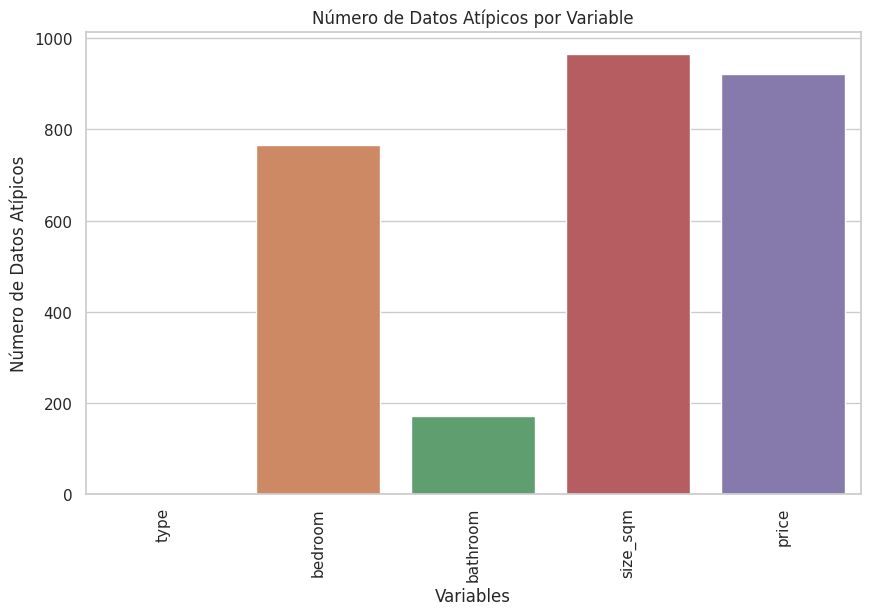

In [25]:
#visualizamos los outliers por columnas 


outliers=visualizar_outliers(datos_clean)
outliers

procedemos a eliminar estos datos

In [26]:
Q1 = datos_clean.quantile(0.25)
Q3 = datos_clean.quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para considerar un valor como outlier
threshold = 1.5

# Encuentra los índices de los valores que son outliers en cada columna
outliers_indices = ((datos_clean < Q1 - threshold * IQR) | (datos_clean > Q3 + threshold * IQR)).any(axis=1)

# Elimina las filas que contienen outliers
datos_clean2 = datos_clean[~outliers_indices]

In [27]:
datos_clean2
'''obtenemos nuestro dataset limpio de datos nulos '''

,type,bedroom,bathroom,size_sqm,price
0,3.0,4.0,4.0,345.0,6850000.0
1,8.0,3.0,3.0,285.0,10000000.0
2,0.0,3.0,3.0,210.0,5700000.0
3,6.0,4.0,4.0,230.0,7510000.0
4,5.0,5.0,6.0,284.0,8511300.0
...,...,...,...,...,...
11412,5.0,3.0,3.0,220.0,4418000.0
11414,6.0,4.0,4.0,220.0,10276891.0
11415,0.0,3.0,3.0,177.0,2811346.0
11416,5.0,5.0,4.0,275.0,3000000.0


graficamos para ver si encontramos algun patron entre el precio , y el numero de habitaciones y numero de baños

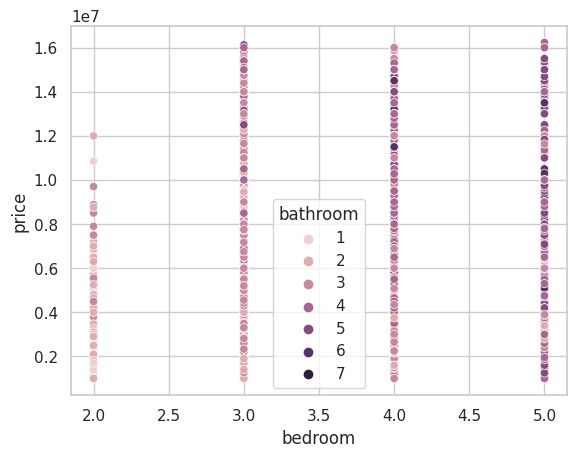

In [28]:
sns.scatterplot(x="bedroom", y="price", hue="bathroom", data=datos_clean2)

# Mostrar la gráfica
plt.show()

# pre-procesamiento

vemos la distribucion de nuestra variable price

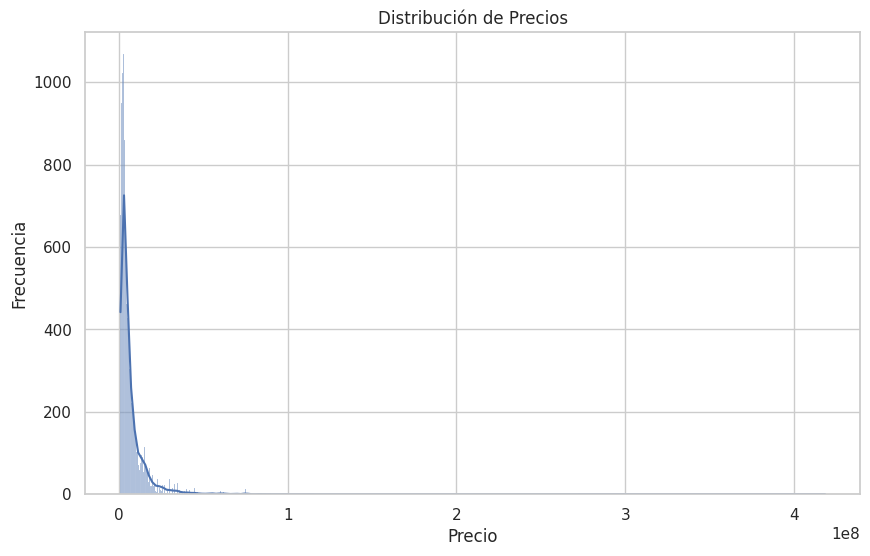

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear un histograma y un gráfico de densidad
sns.histplot(datos_clean['price'], kde=True)

plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()







separamos nuestros datos en datos de entrenamiento y datos de prueba

In [30]:
from sklearn.model_selection import train_test_split


X = datos_clean2.drop(columns=['price'])
y = datos_clean2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

procedemos a escalar los datos con un metodo robusto

In [31]:
from  sklearn  import  preprocessing
from scripts.data_processing import MissingMethods

train_scaler(X_train, y_train)




In [32]:
from  sklearn  import  preprocessing
from scripts.data_processing import MissingMethods

test_scaler(X_test, y_test)

# primer modelo

procedemos a crear nuestro primer modelo , este va a ser una regresion lineal normal

In [33]:
'''con este codigo hacemos una regresion lineal con parametros de regularizacion tipo L1'''

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

alpha = 3.0  # Valor de regularización
modelo1 = Ridge(alpha=alpha, random_state=42)

modelo1.fit(x_train_escalado, y_train_escalado)
y_pred1 = modelo1.predict(x_test_escalado)

mse1 = mean_squared_error(y_test_escalado, y_pred1)
r2_1 = r2_score(y_test_escalado, y_pred1)
print("Mean Squared Error:", mse1)
print("r2_score:", r2_1)


Mean Squared Error: 0.41624688559498924
r2_score: 0.4875135214615848


hacemos predicciones con nuestro modelo

In [34]:
y_pred=modelo1.predict(x_test_escalado)
y_pred

array([[-0.25852234],
       [-0.16516641],
       [-0.1294397 ],
       ...,
       [ 1.38544446],
       [ 0.52439749],
       [-0.37016831]])

hacemos un grafico de residuos para ver que tan bien se comportan nuestros datos predichos

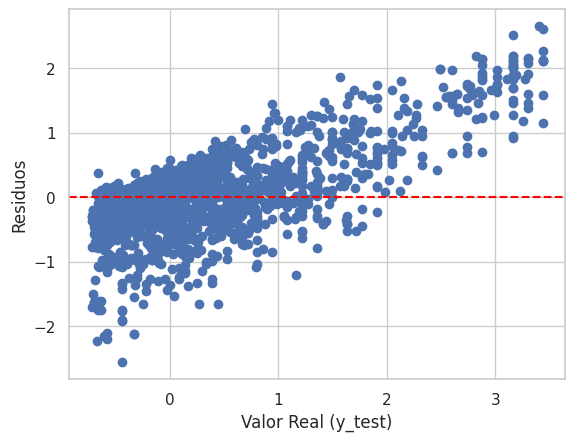

In [36]:
residuos = y_test_escalado - y_pred

# Graficamos los residuos en función de la variable de etiqueta con una línea en el valor cero
plt.scatter(y_test_escalado, residuos)
plt.axhline(0, color='red', linestyle='--')  # Agregamos la  línea en el valor cero
plt.xlabel("Valor Real (y_test)")
plt.ylabel("Residuos")
plt.show()

nuestro modelo no esta generalizando bien y tiene problemas para acoplarse a los datos

In [41]:
'''guardamos nuestro modelo '''

import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo1.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(modelo1, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo1.pkl']

# segundo modelo

entrenamos nuestro segundo modelo , esta vez sera una regresion robusta

In [161]:
percentiles = np.percentile(y_test_escalado, [25, 50, 75])
print("Percentiles 25, 50 y 75:", percentiles)

Percentiles 25, 50 y 75: [-0.33407141  0.          0.66592859]


In [ ]:
'''con este codigo hacemos una regresion robusta , pero en esta ocacion hacemos una busqueda de
hiperparametros con el metodo de la rejilla para llegar a los mejores resultados en cuanto a
hiperparametros '''


from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

modelo2=RANSACRegressor(random_state=42)

parametros= {"base_estimator" :[LinearRegression()],
              "min_samples" : (25,50,75,100),
               "residual_threshold" :(0.1,0.2,0.3,0.4,0.5,0.6,0.7)}

scoring = {
    'r2_score': make_scorer(r2_score),
    'mean_squared_error': make_scorer(mean_squared_error)
}


rejilla = GridSearchCV(modelo2,parametros,scoring=scoring, cv=5,refit='r2_score')


rejilla.fit(x_train_escalado,
            y_train_escalado)


observamos cuales fueron nuestros mejores parametros

In [45]:
print(rejilla.best_params_)

{'base_estimator': LinearRegression(), 'min_samples': 100, 'residual_threshold': 0.1}


hacemos predicciones con nuestro segundo modelo

In [46]:
y_pred2=rejilla.predict(x_test_escalado)

medimos su rendimiento con las metricas de R2_score y MSE

In [47]:
mse2 = mean_squared_error(y_test_escalado, y_pred2)
r2_2 = r2_score(y_test_escalado, y_pred2)

print("el mse es :" ,mse2)
print("el r2 score :" ,r2_2)

el mse es : 0.45017725173663214
el r2 score : 0.44573818460928916


In [48]:
'''luego guardamos nuestro modelo '''

import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo2.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(modelo2, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo2.pkl']

# tercer modelo

este tercer modelo , sera un modelo de stacking donde combinaremos regresores con regularizacion y al final un regresor sin la regularizacion

In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score

#

# Definimos los estimadores
estimators = [('ridge', Ridge(alpha=2.0)), ('lr', LinearRegression())]

# Definimos el estimador final
final_estimator = LinearRegression()

# Creamos el modelo StackingRegressor
model3 = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

# Entrenamos el modelo
model3.fit(x_train_escalado, y_train_escalado)

# Realizamos predicciones en el conjunto de prueba
y_pred3 = model3.predict(x_test_escalado)

# Calculamos el error cuadrático medio del modelo
mse3 = mean_squared_error(y_test_escalado, y_pred3)
r2_3 = r2_score(y_test_escalado, y_pred3)
print("Mean Squared Error:", mse3)
print("r2_score", r2_3)

Mean Squared Error: 0.41624633018520546
r2_score 0.4875142052865312


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
'''guardamos nuestro modelo'''

import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo3.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(model3, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo3.pkl']

# cuarto modelo

para nuestro cuarto modelo armamos un stacking tambien pero a diferencia del anterior este va a ser de otros algoritmos de ensemble como el XGBR y el GradientBoosting y como estimador final una regresion lineal

In [53]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Definimos los estimadores
estimators = [
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1,random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,random_state=42)),
]

# Definimos el estimador final
final_estimator = LinearRegression()

# Creamos el modelo StackingRegressor
model4= StackingRegressor(estimators=estimators, final_estimator=final_estimator)

# Entrenamos el modelo
model4.fit(x_train_escalado, y_train_escalado)

# Realizamos predicciones en el conjunto de prueba
y_pred4 = model4.predict(x_test_escalado)

# Calculamos el error cuadrático medio del modelo
mse4 = mean_squared_error(y_test_escalado, y_pred4)
r2_4 = r2_score(y_test_escalado, y_pred4)
print("Mean Squared Error:", mse4)
print("r2_score", r2_4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.33043214785953584
r2_score 0.5931693095784762


In [54]:
'''guardamos nuestro modelo'''

import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo4.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(model4, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo4.pkl']

# modelo 5

en este modelo armamos un gradient boosting que usualemte usa arboles de decision

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Creamos el modelo de Gradient Boosting
modelo5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenamos el modelo
modelo5.fit(x_train_escalado, y_train_escalado)

# Realizamos predicciones en el conjunto de entrenamiento
y_pred5 = modelo5.predict(x_test_escalado)

#medimos nuestro MSE y nuestro R2_score
mse5 = mean_squared_error(y_test_escalado, y_pred5)
r2_5 = r2_score(y_test_escalado, y_pred5)

print("Mean Squared Error:", mse5)
print("r2_score", r2_5)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.34198643684309954
r2_score 0.5789435770189699


In [57]:
'''guardamos nuestro modelo'''

import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo5.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(modelo5, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo5.pkl']

# modelo 6

para este modelo utilizaremos un random forest con una busqueda en rejilla para encontrar sus mejores parametros

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


modelo_rf = RandomForestRegressor()
# Definimos los parámetros a explorar en la búsqueda en rejilla
parametros = {
    'n_estimators': [25, 50, 75, ],
    'max_depth': [3, 5 ,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

modelo6 = GridSearchCV(modelo_rf, parametros, scoring='neg_mean_squared_error', cv=5)
modelo6.fit(x_train_escalado, y_train_escalado)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75]},
             scoring='neg_mean_squared_error')

vemos cuales son los mejores parametros  y posterior a eso  calculamos nuestro R2_score y nuestro MSE

In [59]:
mejores_parametros_rf = modelo6.best_params_
y_pred6= modelo6.predict(x_test_escalado)

mse6 = mean_squared_error(y_test_escalado, y_pred6)
r2_6 = r2_score(y_test_escalado, y_pred6)

print("Mean Squared Error:", mse6)
print("r2_score", r2_6)


Mean Squared Error: 0.333661066088327
r2_score 0.5891938397555698


In [61]:
import joblib

ruta_carpeta =r'C:\Users\franc\OneDrive\Escritorio\modelos_entrenados'
nombre_archivo = 'modelo6.pkl'

ruta_completa = ruta_carpeta + '\\' + nombre_archivo
joblib.dump(modelo6, ruta_completa)

['C:\\Users\\franc\\OneDrive\\Escritorio\\modelos_entrenados\\modelo6.pkl']

ahora graficamos para comparar todos nuestros modelos y sus rendimientos

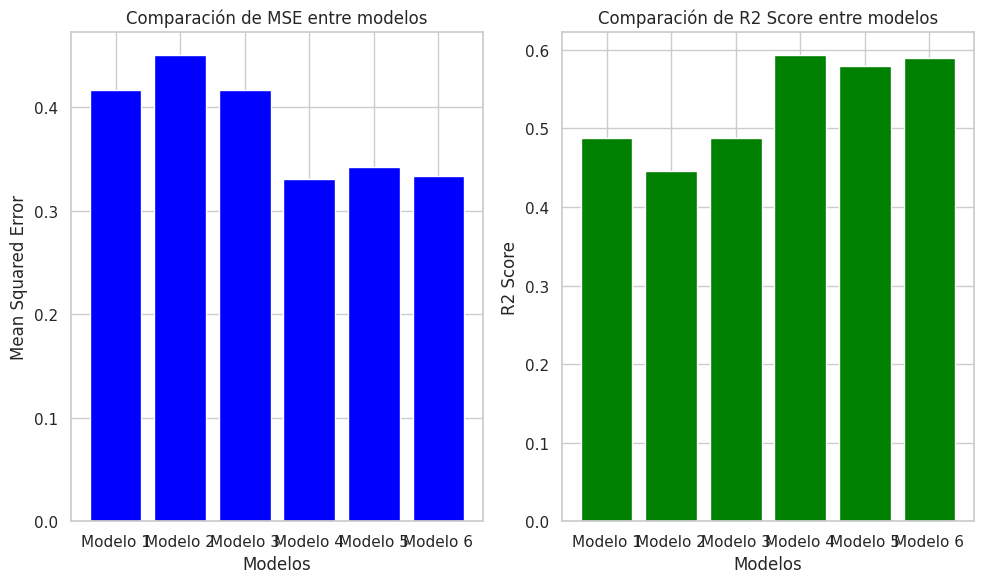

In [60]:
import matplotlib.pyplot as plt

# Nombres de los modelos
model_names = ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4", "Modelo 5", "Modelo 6"]

# Valores de rendimiento ( MSE o R2 Score) para cada modelo
mse_values = [mse1, mse2, mse3, mse4, mse5, mse6]
r2_values = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6]

# Creamos una figura
plt.figure(figsize=(10, 6))

# Gráfico de barras para el MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='blue')
plt.xlabel('Modelos')
plt.ylabel('Mean Squared Error')
plt.title('Comparación de MSE entre modelos')

# Gráfico de barras para el R2 Score
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='green')
plt.xlabel('Modelos')
plt.ylabel('R2 Score')
plt.title('Comparación de R2 Score entre modelos')

# Ajustamos el diseño de los subgráficos
plt.tight_layout()


plt.show()

ahora armamos nuestro escalador inverso para pasar nuestras predicciones a datos reales de valores de las casas

In [184]:
inverse_scaler = preprocessing.RobustScaler().fit(y_train_array.reshape(-1, 1))

# Aplica la transformación inversa a y_pred
y_pred_original_scale = inverse_scaler.inverse_transform(y_pred6.reshape(-1, 1))

y_pred_original_scale

array([[ 2573533.17456112],
       [ 2814751.98958967],
       [ 2967725.5378382 ],
       ...,
       [11621779.86646476],
       [ 5332777.76826173],
       [ 2456443.03012824]])